In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_df = pd.read_csv('.csv')
val_df = pd.read_csv('.csv')
test_df = pd.read_csv('.csv')

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,date,output
0,2015.935871,-14.664821,11.570362,-3.471392,1.383830,1.274393,0.757942,-0.243560,-0.143148,-0.168956,2016-10-01,0.0
1,2015.941566,-14.663104,10.580013,-3.461365,1.472829,1.258748,0.499960,0.037441,-0.876829,-0.506845,2016-10-01,0.0
2,2015.947261,-14.659832,9.614595,-3.436153,2.123118,1.837579,1.361867,-0.101310,-0.749229,-1.394259,2016-10-01,0.0
3,2015.952956,-14.659863,8.608450,-3.435014,2.195288,1.943426,1.550173,-0.317378,-0.452999,-0.976494,2016-10-01,1.0
4,2015.958651,-14.661046,7.613835,-3.443089,2.106928,1.788281,1.200899,-0.073960,-0.720443,-1.347255,2016-10-01,0.0


In [ ]:
val_df.head()

,0,1,2,3,4,5,6,7,8,9,date,output
0,2020.911872,-14.767689,10.580311,5.665823,1.098460,-0.520657,-0.061854,-0.169438,-1.048250,-0.213112,2021-01-01,0.0
1,2020.917567,-14.766911,9.581639,5.663772,1.136543,-0.425839,-0.109429,-0.144685,-1.071402,-0.173949,2021-01-01,0.0
2,2020.923262,-14.766632,8.582394,5.659288,1.151055,-0.369895,-0.176267,-0.122750,-1.083803,-0.149525,2021-01-01,0.0
3,2020.928957,-14.765851,7.591854,5.657830,1.285523,-0.218529,-0.084143,-0.138706,-1.042600,-0.294396,2021-01-01,0.0
4,2020.934652,-14.759414,6.647281,5.691911,2.359744,0.888959,1.481365,-0.553836,-0.468467,-1.379478,2021-01-01,0.0


In [ ]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,date,output
0,2020.932341,-14.688795,11.607575,-2.499735,1.611991,3.022604,0.615993,-0.170830,-0.687852,0.857241,2021-09-01,0.0
1,2020.938036,-14.692174,10.601101,-2.522517,1.173363,2.487489,-0.349253,0.310049,-1.251602,0.609014,2021-09-01,0.0
2,2020.943731,-14.692995,9.599124,-2.521795,1.133997,2.400607,-0.509936,0.419668,-1.378481,0.507734,2021-09-01,0.0
3,2020.949426,-14.691836,8.594724,-2.509283,1.404353,2.701970,0.076943,-0.048052,-0.840759,1.197738,2021-09-01,0.0
4,2020.955121,-14.694939,7.594191,-2.514024,1.173911,2.297307,-0.510036,0.399519,-1.350859,0.535884,2021-09-01,0.0


In [ ]:
X_train = train_svddfd.drop(['date', 'output'], axis = 1)
y_train = train_svddfd.output
X_train = np.asarray(X_train)

X_val = val_svddfd.drop(['date', 'output'], axis = 1)
y_val = val_svddfd.output
X_val = np.asarray(X_val)

X_test = test_svddfd.drop(['date', 'output'], axis = 1)
y_test = test_svddfd.output
X_test = np.asarray(X_test)

# ANN

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(10,), activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32,  activation='relu'))

model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5632      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 180,225
Trainable params: 180,225
Non-trai

In [ ]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train,
                    batch_size=64, epochs=20,
                    verbose=1, validation_data=(X_val, y_val))

# plot_loss_accuracy(history)

Epoch 1/20
583/583 [==============================] - 4s 6ms/step - loss: 9020334.0000 - mean_squared_error: 9020334.0000 - val_loss: 8534200.0000 - val_mean_squared_error: 8534200.0000
Epoch 2/20
583/583 [==============================] - 3s 5ms/step - loss: 2727873.5000 - mean_squared_error: 2727873.5000 - val_loss: 2021272.3750 - val_mean_squared_error: 2021272.3750
Epoch 3/20
583/583 [==============================] - 3s 6ms/step - loss: 1526791.2500 - mean_squared_error: 1526791.2500 - val_loss: 1879164.5000 - val_mean_squared_error: 1879164.5000
Epoch 4/20
583/583 [==============================] - 4s 7ms/step - loss: 1390189.2500 - mean_squared_error: 1390189.2500 - val_loss: 1414487.2500 - val_mean_squared_error: 1414487.2500
Epoch 5/20
583/583 [==============================] - 4s 7ms/step - loss: 1131320.8750 - mean_squared_error: 1131320.8750 - val_loss: 1220688.6250 - val_mean_squared_error: 1220688.6250
Epoch 6/20
583/583 [==============================] - 3s 6ms/step - lo

In [ ]:
model.evaluate(X_test, y_test)[1]

320/320 [==============================] - 1s 2ms/step - loss: 764620.5000 - mean_squared_error: 764620.5000


764620.5

In [ ]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train,
                    batch_size=64, epochs=20,
                    verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
583/583 [==============================] - 3s 4ms/step - loss: 706198.3125 - accuracy: 0.3003 - val_loss: 819283.3125 - val_accuracy: 0.2058
Epoch 2/20
583/583 [==============================] - 2s 4ms/step - loss: 699376.5625 - accuracy: 0.2996 - val_loss: 753307.6875 - val_accuracy: 0.3816
Epoch 3/20
583/583 [==============================] - 2s 4ms/step - loss: 696872.6875 - accuracy: 0.3042 - val_loss: 670563.2500 - val_accuracy: 0.2790
Epoch 4/20
583/583 [==============================] - 2s 4ms/step - loss: 698057.5625 - accuracy: 0.3122 - val_loss: 658004.3750 - val_accuracy: 0.3529
Epoch 5/20
583/583 [==============================] - 3s 5ms/step - loss: 680221.5000 - accuracy: 0.3116 - val_loss: 726307.1250 - val_accuracy: 0.2931
Epoch 6/20
583/583 [==============================] - 3s 5ms/step - loss: 697284.1250 - accuracy: 0.3024 - val_loss: 768932.8750 - val_accuracy: 0.1585
Epoch 7/20
583/583 [==============================] - 2s 4ms/step - loss: 707726.3750 - 

In [ ]:
model.evaluate(X_test, y_test)[1]

320/320 [==============================] - 1s 3ms/step - loss: 844513.9375 - accuracy: 0.3874


0.38742175698280334

# Evaluatation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

sc_y = StandardScaler()

y_pred = model.predict(X_test) # get model predictions (scaled inputs here)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
RMSE_orig = mean_squared_error(y_pred, y_test, squared=False)
RMSE_orig

320/320 [==============================] - 1s 2ms/step


874.4258801982005

In [ ]:
from sklearn.metrics import mean_squared_error

pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

1165/1165 [==============================] - 4s 3ms/step
811.0600928623281
320/320 [==============================] - 1s 2ms/step
874.4258801982005


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.9198086033087486

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', round(mape, 2))

Mean Absolute Percentage Error (MAPE): 6.592904378337431e+16


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', round(mae, 2))
# The model is the most accurate when its MAE is closer to 0.

Mean Absolute Error (MAE): 436.42


# 2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (27954, 7) (27954,) 
Test Shape: (9319, 7) (9319,)


In [ ]:
from sklearn.preprocessing import StandardScaler
# input scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

# outcome scaling:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.array.reshape(-1, 1))    
y_test = sc_y.transform(y_test.array.reshape(-1, 1))
y_val = sc_y.transform(y_val.array.reshape(-1, 1))

In [ ]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

# 3

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers
from keras.utils import np_utils
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Dense(14,  activation= 'relu', input_shape=(7,)))
model.add(Dense(7, activation= 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(3, activation= 'relu'))



model.add(Dense(1))

model.summary()

adm = optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error',
              optimizer=adm,
              metrics=['mean_squared_error'])

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=1000,
                    verbose=1, validation_data=(X_val, y_val))


score = model.evaluate(X_test, y_test, metrics=['mean_squared_error'], verbose=0)
error = score[0]

# plt.plot(history.history['loss'])
# plt.show()
# plt.gcf().clear()


Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_230 (Dense)           (None, 14)                112       
                                                                 
 dense_231 (Dense)           (None, 7)                 105       
                                                                 
 dense_232 (Dense)           (None, 3)                 24        
                                                                 
 dense_233 (Dense)           (None, 1)                 4         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
219/219 [==============================] - 1s 4ms/step - loss: 2285081.7500 - mean_squared_error: 2285081.7500 - val_loss: 13145614.0000 - val_mean_squared_error: 13145614.00

TypeError: ignored

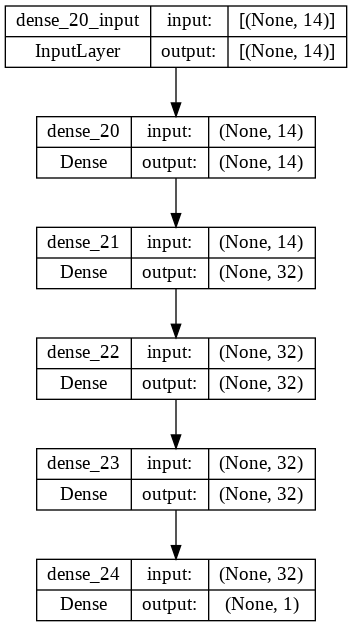

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

# ANN 2

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
final_df = pd.read_csv('/content/drive/Shareddrives/DATA 298A/DATA/DATA_298_Dataset_NONULL.csv')

In [ ]:
final_df = final_df.drop(['Unnamed: 0'], axis =1)
final_df.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,conditions,date
0,2016,9,1,0,0.000000,71.170491,0.0,70.4,86.83,0.0,0.0,1014.2,42.0,7.9,0.0,Partially cloudy,2016-09-01
1,2016,9,1,1,0.000000,70.416885,0.0,68.8,84.70,0.0,0.0,1014.1,42.0,8.6,0.0,Partially cloudy,2016-09-01
2,2016,9,1,2,0.000000,70.084926,0.0,68.8,86.21,0.0,0.0,1014.2,31.6,9.6,0.0,Partially cloudy,2016-09-01
3,2016,9,1,3,0.000000,70.635324,0.5,68.6,85.66,0.0,0.0,1014.1,31.6,9.7,0.0,Partially cloudy,2016-09-01
4,2016,9,1,4,0.070511,71.215050,0.0,68.6,86.49,0.0,0.0,1014.1,73.9,9.2,0.0,Partially cloudy,2016-09-01


In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(gap=0, n_splits=3)
print(tss)

# final_df.set_index('Year', inplace=True)
# final_df.sort_index(inplace=True)
X = final_df.drop(labels=['output'], axis=1)
y = final_df['output']
del a
a = tss.split(X)
# for train_index, test_index, valid_index in tss.split(X):
#     X_train, X_test, X_valid = X.iloc[train_index, :], X.iloc[test_index,:], X.iloc[valid_index,:]
#     y_train, y_test, y_test = y.iloc[train_index], y.iloc[test_index], y.iloc[valid_index]
    

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)


In [ ]:
for i in a:
  print(i)

(array([    0,     1,     2, ..., 13509, 13510, 13511]), array([13512, 13513, 13514, ..., 27021, 27022, 27023]))
(array([    0,     1,     2, ..., 27021, 27022, 27023]), array([27024, 27025, 27026, ..., 40533, 40534, 40535]))
(array([    0,     1,     2, ..., 40533, 40534, 40535]), array([40536, 40537, 40538, ..., 54045, 54046, 54047]))


In [ ]:
X_train

,Month,Day,Hour,GHI,TmpF,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,conditions,date
Year,,,,,,,,,,,,,,,
2016,9,1,0,0.000000,71.170491,70.4,86.83,0.0,0.0,1014.2,42.0,7.9,0.0,Partially cloudy,2016-09-01
2016,9,1,1,0.000000,70.416885,68.8,84.70,0.0,0.0,1014.1,42.0,8.6,0.0,Partially cloudy,2016-09-01
2016,9,1,2,0.000000,70.084926,68.8,86.21,0.0,0.0,1014.2,31.6,9.6,0.0,Partially cloudy,2016-09-01
2016,9,1,3,0.000000,70.635324,68.6,85.66,0.0,0.0,1014.1,31.6,9.7,0.0,Partially cloudy,2016-09-01
2016,9,1,4,0.070511,71.215050,68.6,86.49,0.0,0.0,1014.1,73.9,9.2,0.0,Partially cloudy,2016-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,4,16,19,2.463386,55.876363,35.9,37.36,0.0,0.0,1012.0,15.8,9.9,148.0,Clear,2021-04-16
2021,4,16,20,0.000000,52.813572,35.7,38.98,0.0,0.0,1012.2,28.1,9.9,27.0,Partially cloudy,2021-04-16
2021,4,16,21,0.000000,50.266980,36.6,47.13,0.0,0.0,1012.3,28.1,9.9,5.0,Partially cloudy,2021-04-16


In [ ]:
X_test

,Month,Day,Hour,GHI,TmpF,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,conditions,date
Year,,,,,,,,,,,,,,,
2020,10,11,8,61.764808,65.411507,62.7,87.76,0.002,0.0,1011.0,63.3,9.9,8.0,"Rain, Partially cloudy",2020-10-11
2020,10,11,9,91.763555,65.530507,62.7,87.76,0.000,0.0,1011.4,92.5,9.9,42.0,Overcast,2020-10-11
2020,10,11,10,115.625036,65.923159,63.6,83.08,0.000,0.0,1011.7,52.5,9.9,26.0,Partially cloudy,2020-10-11
2020,10,11,11,215.005685,66.355616,63.6,78.28,0.000,0.0,1011.5,76.3,9.9,99.0,Partially cloudy,2020-10-11
2020,10,11,12,117.442355,66.788074,64.3,69.81,0.000,0.0,1011.4,92.5,9.9,245.0,Overcast,2020-10-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,10,31,19,0.000000,60.611901,56.9,80.58,0.006,0.0,1012.8,96.5,9.9,16.0,"Rain, Overcast",2022-10-31
2022,10,31,20,0.000000,59.977662,57.0,87.25,0.009,0.0,1014.0,100.0,5.5,38.0,"Rain, Overcast",2022-10-31
2022,10,31,21,0.000000,59.358295,57.8,94.30,0.187,0.0,1014.6,100.0,3.7,38.0,"Rain, Overcast",2022-10-31


In [ ]:
final_df.tail()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,snow,sealevelpressure,cloudcover,visibility,solarradiation,conditions,date
54043,2022,10,31,19,0.0,60.611901,0.0,56.9,80.58,0.006,0.0,1012.8,96.5,9.9,16.0,"Rain, Overcast",2022-10-31
54044,2022,10,31,20,0.0,59.977662,0.0,57.0,87.25,0.009,0.0,1014.0,100.0,5.5,38.0,"Rain, Overcast",2022-10-31
54045,2022,10,31,21,0.0,59.358295,0.0,57.8,94.30,0.187,0.0,1014.6,100.0,3.7,38.0,"Rain, Overcast",2022-10-31
54046,2022,10,31,22,0.0,59.023864,0.0,57.2,92.82,0.009,0.0,1014.8,100.0,9.9,38.0,"Rain, Overcast",2022-10-31
54047,2022,10,31,23,0.0,58.876139,0.0,56.9,94.28,0.007,0.0,1015.4,100.0,9.2,38.0,"Rain, Overcast",2022-10-31


In [ ]:
X = final_df.drop(['Year', 'Month', 'Day', 'Hour', 'TmpF', 'output', 'dew',
       'humidity', 'precip', 'snow', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'conditions', 'date'], axis = 1)
X = np.asarray(X)
y = final_df['output']

In [ ]:
X = train_df.drop(['Year', 'Month', 'Day', 'Hour', 'TmpF', 'output', 'dew',
       'humidity', 'precip', 'snow', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'date', 'Clear',
       'Freezing Drizzle/Freezing Rain, Overcast', 'Ice, Overcast', 'Overcast',
       'Partially cloudy', 'Rain', 'Rain, Overcast', 'Rain, Partially cloudy',
       'Snow, Overcast', 'Snow, Partially cloudy', 'Snow, Rain, Overcast',
       'Snow, Rain, Partially cloudy'
                   ], axis = 1)
X = np.asarray(X)
y = train_df['output']

In [ ]:
X_val = valaidation_df.drop(['Year', 'Month', 'Day', 'Hour', 'TmpF', 'output', 'dew',
       'humidity', 'precip', 'snow', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'date', 'Clear',
       'Freezing Drizzle/Freezing Rain, Overcast', 'Ice, Overcast', 'Overcast',
       'Partially cloudy', 'Rain', 'Rain, Overcast', 'Rain, Partially cloudy',
       'Snow, Overcast', 'Snow, Partially cloudy', 'Snow, Rain, Overcast',
       'Snow, Rain, Partially cloudy'
                   ], axis = 1)
X_val = np.asarray(X_val)
y_val = valaidation_df['output']

In [ ]:
x_test = test_df.drop(['Year', 'Month', 'Day', 'Hour', 'TmpF', 'output', 'dew',
       'humidity', 'precip', 'snow', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'date', 'Clear',
       'Freezing Drizzle/Freezing Rain, Overcast', 'Ice, Overcast', 'Overcast',
       'Partially cloudy', 'Rain', 'Rain, Overcast', 'Rain, Partially cloudy',
       'Snow, Overcast', 'Snow, Partially cloudy', 'Snow, Rain, Overcast',
       'Snow, Rain, Partially cloudy'
                   ], axis = 1)
x_test = np.asarray(x_test)
y_test = test_df['output']

In [ ]:
X.shape, y.shape

((54048, 1), (54048,))

In [ ]:
train_df = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/train_df.csv')
val_df = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/valaidation_df.csv')
test_df = pd.read_csv('./drive/Shareddrives/DATA 298A/DATA/test_df.csv')

train_df.shape, val_df.shape, test_df.shape

((37273, 28), (5831, 28), (10224, 28))

In [ ]:
train_df.head()

,Year,Month,Day,Hour,GHI,TmpF,output,dew,humidity,precip,...,"Ice, Overcast",Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy","Snow, Overcast","Snow, Partially cloudy","Snow, Rain, Overcast","Snow, Rain, Partially cloudy"
0,2016,10,1,0,0.000000,56.997313,0.0,53.3,87.78,0.025,...,0,0,0,0,0,1,0,0,0,0
1,2016,10,1,1,0.000000,56.929524,0.0,53.3,91.47,0.005,...,0,0,0,0,1,0,0,0,0,0
2,2016,10,1,2,0.001702,57.055018,0.0,54.0,93.96,0.000,...,0,1,0,0,0,0,0,0,0,0
3,2016,10,1,3,0.065986,57.198007,1.0,54.0,92.12,0.021,...,0,0,0,0,1,0,0,0,0,0
4,2016,10,1,4,0.163879,57.340995,0.0,54.1,93.36,0.000,...,0,1,0,0,0,0,0,0,0,0


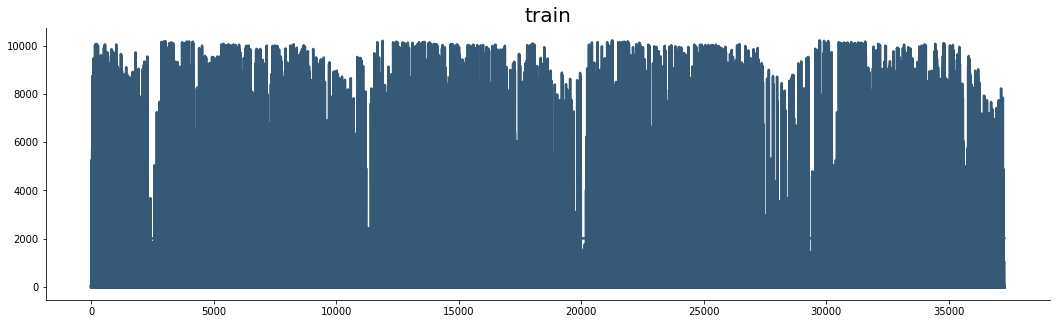

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load

# Visualize
plt.title('train', size=20)
plt.plot(train_df.drop(['date'], axis = 1));

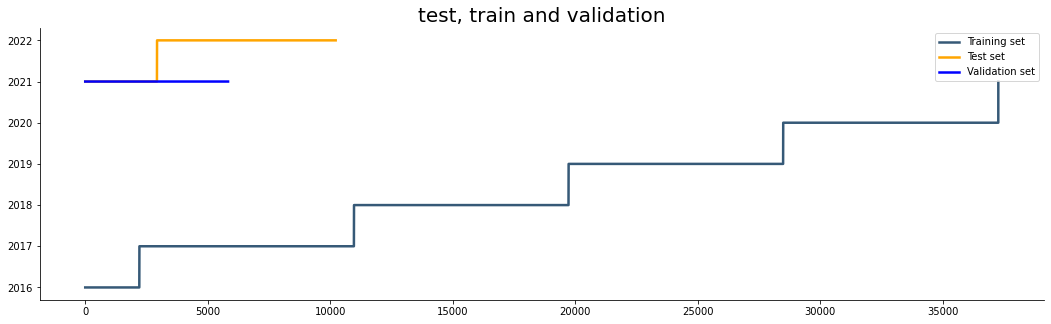

In [ ]:
plt.title('test, train and validation', size=20)
plt.plot(train_df['Year'], label='Training set')
plt.plot(test_df['Year'], label='Test set', color='orange')
plt.plot(val_df['Year'], label='Validation set', color='blue')
plt.legend();

In [ ]:
X_train = train_df.drop(['output','date'], axis = 1)
X_train = np.asarray(X_train)
y_train = train_df['output']

In [ ]:
X_val = val_df.drop(['output', 'date'], axis = 1)
X_val = np.asarray(X_val)
y_val = val_df['output']

In [ ]:
X_test = test_df.drop(['output', 'date'], axis = 1)
X_test = np.asarray(X_test)
y_test = test_df['output']

In [ ]:
model_2 = Sequential([
    Dense(100, kernel_initializer='uniform', activation='relu', input_shape=(26,)),
    Dense(100, kernel_initializer='uniform', activation='relu'),
    Dense(100, kernel_initializer='uniform', activation='relu'),
    Dense(100, kernel_initializer='uniform', activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(Adam(lr=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, y_train,
          batch_size=32, epochs=1,
          validation_data=(X_val, y_val))

1165/1165 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.3278 - val_loss: nan - val_accuracy: 0.4606


In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(1,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               256       
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 11,137
Trainable params: 11,137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

1689/1689 [==============================] - 7s 3ms/step - loss: 12905695.0000 - accuracy: 0.4763 - val_loss: 12905695.0000 - val_accuracy: 0.4763


<Figure size 576x432 with 0 Axes>

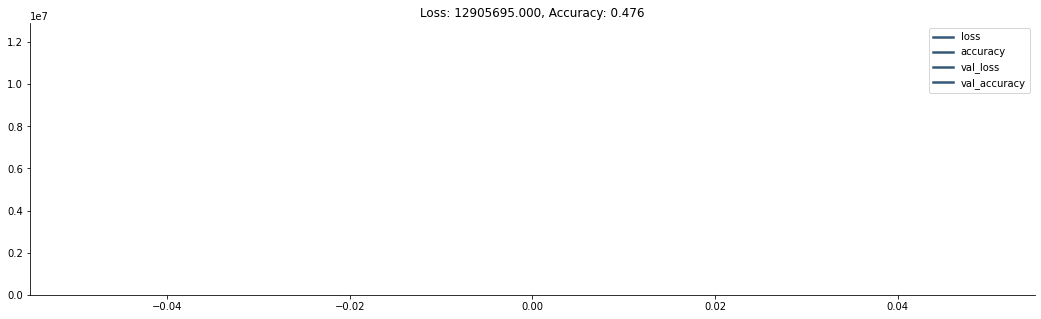

In [ ]:
model.compile(Adam(lr=0.001), loss = 'MSE', metrics=['accuracy'])

history = model.fit(X, y,
          batch_size=32, epochs=1,
          validation_data=(X, y))

# plot_loss_accuracy(history)

In [ ]:
model_2.evaluate(X_test, y_test)[1]

320/320 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.4841


0.48405712842941284

In [ ]:
# # list all data in history
# print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# # plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# # plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()